<a href="https://colab.research.google.com/github/schauppi/Tensorflow/blob/schauppi/Siamese_Neural_Network/Build_siamese_pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def make_pairs(images, labels):
  #lists for image pairs and labels
  pairImages = []
  pairLabels = []

  #calculate label count
  numClasses = len(np.unique(labels))
  idx = [np.where(labels == i)[0] for i in range(0, numClasses)]

  #loop over all images
  for idxA in range(len(images)):
    currentImage = images[idxA]
    label = labels[idxA]

    #pick random image from same class
    idxB = np.random.choice(idx[label])
    posImage = images[idxB]

    #prepare positive pair and labels
    pairImages.append([currentImage, posImage])
    pairLabels.append([1])

    #pick random image from other class
    negIdx = np.where(labels != label)[0]
    negImage = images[np.random.choice(negIdx)]

    #prepare negative pair and labels
    pairImages.append([currentImage, negImage])
    pairLabels.append([0])

  return (np.array(pairImages), np.array(pairLabels))

In [3]:
#load mnist
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#build the image pairs
(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

In [10]:
images = []

In [16]:
# loop over a sample of our training pairs
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
	# grab the current image pair and label
	imageA = pairTrain[i][0]
	imageB = pairTrain[i][1]
	label = labelTrain[i]
	# to make it easier to visualize the pairs and their positive or
	# negative annotations, we're going to "pad" the pair with four
	# pixels along the top, bottom, and right borders, respectively
	output = np.zeros((36, 60), dtype="uint8")
	pair = np.hstack([imageA, imageB])
	output[4:32, 0:56] = pair
	# set the text label for the pair along with what color we are
	# going to draw the pair in (green for a "positive" pair and
	# red for a "negative" pair)
	text = "neg" if label[0] == 0 else "pos"
	color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)
	# create a 3-channel RGB image from the grayscale pair, resize
	# it from 60x36 to 96x51 (so we can better see it), and then
	# draw what type of pair it is on the image
	vis = cv2.merge([output] * 3)
	vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
	cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
	# add the pair visualization to our list of output images
	images.append(vis)

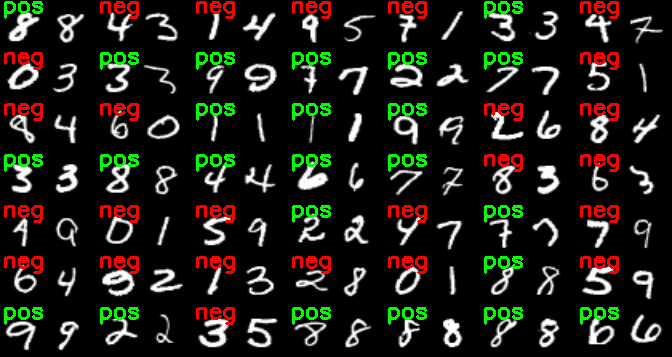

-1

In [19]:
# construct the montage for the images
montage = build_montages(images, (96, 51), (7, 7))[0]
# show the output montage
cv2_imshow(montage)
cv2.waitKey(0)